In [1]:
from google.colab import drive
drive.mount('/content/drive')  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

# !pip install --no-cache-dir -I pillow

device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

  HTTP error 403 while getting http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
  Could not install requirement torch==0.4.1 from http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
Could not install requirement torch==0.4.1 from http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu100/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
cuda:0


In [3]:
import scipy.ndimage
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


In [0]:
import torch.utils.data as utils
import pdb
import cv2
import glob
import os 
import numpy as np
from scipy.ndimage import imread 
from PIL import Image
import matplotlib.pylab as pylab
import pdb
# import matplotlib.plt as plt 




def fcount(path, map = {}):
  count = 0
  for f in os.listdir(path):
    child = os.path.join(path, f)
    if os.path.isdir(child):
      child_count = fcount(child, map)
      count += child_count + 1 # unless include self
  map[path] = count
  return count

class HindiDataset(utils.Dataset):
  
  def __init__(self, transform=None):
    root_path = 'drive/Team Drives/CIS700 Final Project/HindiDataset'
    labels = ['athlete', 'children', 'farmer', 'police', 'soldier', 'wedding']
    self.transform = transform
    self.images = []
    self.labels = []
    self.file_names = []
    for i in range(0, len(labels)):
      print(i)
      curr_label = labels[i]
      curr_folder = root_path + '/' + curr_label
#       counter = 0 
      break_flag = False
      counter = 0
#       for root,dirs,files in os.walk(curr_folder):
#         if not dirs:
#             count+=1
      for root, dirs, files in os.walk(curr_folder):
        if break_flag:
          break
        for name in sorted(files):
          if name.endswith(("jpg")):
            current_image = imread(root + '/' + name, mode='RGB')
#             print(name)
#             print(current_image)
#             pdb.set_trace()
            self.file_names.append(root + '/' + name)
            self.images.append(current_image)
            self.labels.append(i)
            self.labels.reversed()
            self.images.reversed()
            self.file_names.reversed()
            counter+=1
            if counter >= 150:
              break_flag = True
              break
      
#             print(i)
#     pdb.set_trace()
     
            
  def __len__(self):
    return len(self.images)
  
  def __getitem__(self, idx):
    current_image = self.images[idx]
    current_label = self.labels[idx]
#     current_image = np.transpose(current_image, (2, 0, 1))
#     pdb.set_trace()
    if self.transform:
#       current_image = np.resize(current_image, (224, 224, 3))
#       current_image = np.transpose(current_image, (2, 0, 1))
      current_image = self.transform(current_image)
#       pdb.set_trace()
#     pdb.set_trace()
    sample = {'images': current_image.cpu(), 'labels': torch.tensor(current_label).cpu()}
    return sample

    
# HindiDataset()

In [0]:

class EnglishDataset(utils.Dataset):
  
  def __init__(self, transform=None):
    root_path = 'drive/Team Drives/CIS700 Final Project/EnglishDataset'
    labels = ['athlete', 'children', 'farmer', 'police', 'soldier']
    self.transform = transform
    self.images = []
    self.labels = []
    for i in range(0, len(labels)):
      print(i)
      curr_label = labels[i]
      curr_folder = root_path + '/' + curr_label
#       counter = 0 
      break_flag = False
      counter = 0
#       for root,dirs,files in os.walk(curr_folder):
#         if not dirs:
#             count+=1
      for root, dirs, files in os.walk(curr_folder):
        if break_flag:
          break
        for name in sorted(files):
          if name.endswith(("jpg")):
            current_image = imread(root + '/' + name, mode='RGB')
#             print(name)
#             print(current_image)
            self.images.append(current_image)
            self.labels.append(i)
            counter+=1
            if counter >= 150:
              break_flag = True
              break
              
  def __len__(self):
    return len(self.images)
  
  def __getitem__(self, idx):
    current_image = self.images[idx]
    current_label = self.labels[idx]
#     current_image = np.transpose(current_image, (2, 0, 1))
#     pdb.set_trace()
    if self.transform:
#       current_image = np.resize(current_image, (224, 224, 3))
#       current_image = np.transpose(current_image, (2, 0, 1))
      current_image = self.transform(current_image)
#       pdb.set_trace()
#     pdb.set_trace()
    sample = {'images': current_image.cpu(), 'labels': torch.tensor(current_label).cpu()}
    return sample

In [0]:
import torch.utils.data as utils
import pdb
import cv2
import glob
import os 
import numpy as np
from scipy.ndimage import imread 
from PIL import Image
import matplotlib.pylab as pylab
import pdb
# import matplotlib.plt as plt 


def fcount(path, map = {}):
  count = 0
  for f in os.listdir(path):
    child = os.path.join(path, f)
    if os.path.isdir(child):
      child_count = fcount(child, map)
      count += child_count + 1 # unless include self
  map[path] = count
  return count

class CombinedDataset(utils.Dataset):
  
  def __init__(self, transform=None):
    root_path = 'drive/Team Drives/CIS700 Final Project/HindiDataset'
    labels = ['athlete', 'children', 'farmer', 'police', 'soldier', 'wedding']
    self.transform = transform
    self.images = []
    self.labels = []
    for i in range(0, len(labels)):
      print(i)
      curr_label = labels[i]
      curr_folder = root_path + '/' + curr_label
#       counter = 0 
      break_flag = False
      counter = 0
#       for root,dirs,files in os.walk(curr_folder):
#         if not dirs:
#             count+=1
      for root, dirs, files in os.walk(curr_folder):
        if break_flag:
          break
        for name in sorted(files):
          if name.endswith(("jpg")):
            current_image = imread(root + '/' + name, mode='RGB')
#             print(name)
#             print(current_image)
#             pdb.set_trace()
            self.images.append(current_image)
            self.labels.append(i)
            counter+=1
            if counter >= 150:
              break_flag = True
              break
              
    root_path = 'drive/Team Drives/CIS700 Final Project/EnglishDataset'
    labels = ['athlete', 'children', 'farmer', 'police', 'soldier', 'wedding']
    
    for i in range(0, len(labels)):
      print(i)
      curr_label = labels[i]
      curr_folder = root_path + '/' + curr_label
#       counter = 0 
      break_flag = False
      counter = 0
#       for root,dirs,files in os.walk(curr_folder):
#         if not dirs:
#             count+=1
      for root, dirs, files in os.walk(curr_folder):
        if break_flag:
          break
        for name in sorted(files):
          if name.endswith(("jpg")):
            current_image = imread(root + '/' + name, mode='RGB')
#             print(name)
#             print(current_image)
#             pdb.set_trace()
            self.images.append(current_image)
            self.labels.append(i)
            counter+=1
            if counter >= 150:
              break_flag = True
              break
      
#             print(i)
#     pdb.set_trace()
     
            
  def __len__(self):
    return len(self.images)
  
  def __getitem__(self, idx):
    current_image = self.images[idx]
    current_label = self.labels[idx]
#     current_image = np.transpose(current_image, (2, 0, 1))
#     pdb.set_trace()
    if self.transform:
#       current_image = np.resize(current_image, (224, 224, 3))
#       current_image = np.transpose(current_image, (2, 0, 1))
      current_image = self.transform(current_image)
#       pdb.set_trace()
#     pdb.set_trace()
    sample = {'images': current_image.cpu(), 'labels': torch.tensor(current_label).cpu()}
    return sample

    
# HindiDataset()

In [5]:
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.sampler import SubsetRandomSampler
!git clone https://github.com/cis700/hw1-release.git
!mv hw1-release/dills/* .
!mv hw1-release hw1

Cloning into 'hw1-release'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 26 (delta 6), reused 23 (delta 6), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [0]:
# from torchvision import transforms

# image_edge_size = 128
# batch_size = 50

# dataset = HindiDataset(transform=transforms.Compose([transforms.ToPILImage(), transforms.Resize((image_edge_size, image_edge_size)), transforms.ToTensor()]))
# dataset_loader = utils.DataLoader(dataset, batch_size=batch_size)

# ## define our indices -- our dataset has 9 elements and we want a 8:4 split
# num_train = len(dataset)
# print(num_train)
# indices = list(range(num_train))
# split = 150
# # 700 total
# # 1400 train, 600 test
# # image_edge_size = 128

# # Random, non-contiguous split
# validation_idx = np.random.choice(indices, size=split, replace=False)# validation_idx = np.random.choice(indices, size=split, replace=False)
# train_idx = list(set(indices) - set(validation_idx))

# # Contiguous split
# # train_idx, validation_idx = indices[split:], indices[:split]

# ## define our samplers -- we use a SubsetRandomSampler because it will return
# ## a random subset of the split defined by the given indices without replaf
# train_sampler = SubsetRandomSampler(train_idx)
# validation_sampler = SubsetRandomSampler(validation_idx)

# train_loader = torch.utils.data.DataLoader(dataset, 
#                 batch_size=batch_size, sampler=train_sampler)

# test_loader = torch.utils.data.DataLoader(dataset, 
#                 batch_size=batch_size, sampler=validation_sampler)

0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


1
2
3
4
5
799


In [0]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
  
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    
    self.layer1 = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3),
      nn.ReLU() ,
      nn.BatchNorm2d(num_features=64),
      nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    )
    
    self.layer2 = nn.Sequential(
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
      nn.ReLU() ,
      nn.BatchNorm2d(num_features=128),
      nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    )
    
    self.layer3 = nn.Sequential(
      nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3),
      nn.ReLU() ,
      nn.BatchNorm2d(num_features=256),
#       nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    )
    
    self.layer4 = nn.Sequential(
      nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3),
      nn.ReLU() ,
      nn.BatchNorm2d(num_features=512),
#       nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    )
    
    self.dropout = nn.Dropout(0.5)
    
    self.layer5 = nn.Sequential(
      nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3),
      nn.ReLU() ,
      nn.BatchNorm2d(num_features=1024),
      nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    )
    
    self.layer6 = nn.Sequential(
      nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3),
      nn.ReLU() ,
      nn.BatchNorm2d(num_features=512)
#       nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    )
    
#     self.layer7 = nn.Sequential(
#       nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3),
#       nn.ReLU() ,
#       nn.BatchNorm2d(num_features=256)
# #       nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
#     )
    
    self.fc1 = nn.Sequential(
        nn.Linear(4608, 100),
        nn.ReLU() 
    )
    
    self.fc2 = nn.Sequential(
        nn.Linear(100, 6)
#         nn.Softmax() 
    )
    
    
  def forward(self, x):
#       pdb.set_trace()
      x = self.layer1(x)
#       pdb.set_trace()
      x = self.layer2(x)
#       pdb.set_trace()
      x = self.layer3(x)
      x = self.dropout(x)
  
      x = self.layer4(x)
      x = self.dropout(x)
      x = self.layer5(x)
      x = self.dropout(x)
      x = self.layer6(x)
#       x = self.layer7(x)
#       x = self.layer8(x)
#       pdb.set_trace()
      x = x.view(-1, self.num_flat_features(x))
#       pdb.set_trace()
      x = self.fc1(x)
#       pdb.set_trace()
      x = self.fc2(x)
#       pdb.set_trace()
      return x
    
  def num_flat_features(self, x):
      size = x.size()[1:]  # all dimensions except the batch dimension
      num_features = 1
      for s in size:
          num_features *= s
      return num_features

In [36]:
LOG_DIR = './logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

!if [ -f ngrok ] ; then echo "Ngrok already installed" ; else wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip > /dev/null 2>&1 && unzip ngrok-stable-linux-amd64.zip > /dev/null 2>&1 ; fi
  
get_ipython().system_raw('./ngrok http 6006 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print('Tensorboard Link: ' +str(json.load(sys.stdin)['tunnels'][0]['public_url']))"
  
  

Ngrok already installed
Tensorboard Link: https://79699597.ngrok.io


In [0]:
import torch.nn as nn

class LogisticRegression(nn.Module): 
    def __init__(self, input_size, num_classes): 
        super(LogisticRegression, self).__init__() 
        self.linear = nn.Linear(input_size, num_classes) 
  
    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
#         pdb.set_trace()
        out = self.linear(x)
#         pdb.set_trace()
        return out 

    def num_flat_features(self, x):
      size = x.size()[1:]  # all dimensions except the batch dimension
      num_features = 1
      for s in size:
          num_features *= s
      return num_features

In [49]:
# Use this object to help with tensorboard integration!
from hw1.helper import Logger
import torch.optim as optim

# netw = NeuralNetwork().to(device)
# netw = LogisticRegression(224*224*3, 6).to(device)

train_model(net)


def train_model(net):  
  lr_array = [0.001]
  for learning_rate in lr_array:
    log_string = './logs/_Combined_'
    logger = Logger(log_string)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters())  
    step = 0.0
#     num_epochs = 100
    num_epochs = 0
    max_epochs = 2
#     batch_size = 20
    max_steps = 10000
    i = 0
    final_predicted = np.array([])
    final_actual = np.array([])
    while num_epochs < max_epochs:
      train_iterator = iter(train_loader)
      num_epochs += 1 
      for batch in train_iterator:
        images = batch['images'].type(torch.cuda.FloatTensor)
        labels = batch['labels'].type(torch.cuda.LongTensor)
        curr_image = images[0]
#         pylab.imshow(np.transpose(curr_image.cpu(), (1, 2, 0)))
#         pylab.show()
#         pdb.set_trace()
#         pdb.set_trace()
        optimizer.zero_grad()
        out = net(images)
#         pdb.set_trace()
        loss = criterion(out, labels)
#         pdb.set_trace()
        loss.backward()
        if (step) % 1 == 0: 
#             pdb.set_trace()
            # Test the Model 
            correct = 0
            total = 0
#             pdb.set_trace()
            test_iterator = iter(test_loader2)
  
            total0 = 0
            total1 = 0
            total2 = 0
            total3 = 0
            total4 = 0
            total5 = 0
            total6 = 0
            
            correct0 = 0
            correct1 = 0
            correct2 = 0
            correct3 = 0
            correct4 = 0
            correct5 = 0
            correct6 = 0
            net.eval()
            if num_epochs == 9:
              final_predicted = np.array([])
              final_actual = np.array([])
              
            for batch in test_iterator: 
                images = batch['images'].type(torch.cuda.FloatTensor)
                labels = batch['labels'].type(torch.cuda.LongTensor)
                outputs = net(images) 
                _, predicted = torch.max(outputs.data, 1) 
#                 pdb.set_trace()
                total += labels.size(0) 
                correct += (predicted == labels).sum() 
                if num_epochs == 9:
#                   pdb.set_trace()
                  final_actual = np.hstack((final_actual, labels.cpu().detach().numpy()))
                  final_predicted = np.hstack((final_predicted, predicted.cpu().detach().numpy()))
#                   pdb.set_trace()
                  
                total0 += (labels==0).sum()
                total1 += (labels==1).sum()
                total2 += (labels==2).sum()
                total3 += (labels==3).sum()
                total4 += (labels==4).sum()
                total5 += (labels==5).sum()
                total6 += (labels==6).sum()

#                 pdb.set_trace()
                correct0 += (predicted[labels==0] == 0).sum()
                correct1 += (predicted[labels==1] == 1).sum()
                correct2 += (predicted[labels==2] == 2).sum()
                correct3 += (predicted[labels==3] == 3).sum()
                correct4 += (predicted[labels==4] == 4).sum()
                correct5 += (predicted[labels==5] == 5).sum()
                correct6 += (predicted[labels==5] == 5).sum()
            
#             pdb.set_trace()
     
#             print('label0 accuracy:', correct0/total0.type(torch.FloatTensor))
#             print('label1 accuracy:', correct1/total1.type(torch.FloatTensor))
#             print('label2 accuracy:', correct2/total2.type(torch.FloatTensor))
#             print('label3 accuracy:', correct3/total3.type(torch.FloatTensor))
#             print('label4 accuracy:', correct4/total4.type(torch.FloatTensor))
#             print('label5 accuracy:', correct5/total5.type(torch.FloatTensor))
#             print('label6 accuracy:', correct6/total6.type(torch.FloatTensor))
            
            test_accuracy = 100*correct/total
#             if num_epochs == 1:
#               pdb.set_trace()
            correct = 0
            total = 0
            
            train_acc_iterator = iter(train_loader)
            for batch in train_acc_iterator:
                images = batch['images'].type(torch.cuda.FloatTensor)
                labels = batch['labels'].type(torch.cuda.LongTensor)
                outputs = net(images) 
                _, predicted = torch.max(outputs.data, 1) 
                total += labels.size(0) 
                correct += (predicted == labels).sum() 
#             pdb.set_trace()
            accuracy = 100*correct/total
            print('Test accuracy is', test_accuracy)
            print('Train accuracy is', accuracy)
            info = {'loss': loss.item(), 'accuracy': accuracy.item(), 'test_accuracy':test_accuracy}
            for tag, value in info.items():
              logger.scalar_summary(tag, value, step+1)
#             for tag, value in net.named_parameters():
#               tag = tag.replace('.', '/')
#               logger.histo_summary(tag, value.data.cpu().numpy(), step+1)
#               logger.histo_summary(tag+'/grad', value.grad.data.cpu().numpy(), step+1)
#             print('Epoch: [% d/% d], Step: [% d/% d], Loss: %.4f'
#                   % (step + 1, max_steps, i + 1, 
#                      num_train - split // batch_size, loss.data))
            with torch.no_grad():
              info = { 'outputs': images[:5].cpu().numpy() }

              for tag, outputs in info.items():
                  logger.image_summary(tag, outputs, step)
            net.train()
        step = step+1
        i = i +1
        optimizer.step()
#   pdb.set_trace()
  return final_actual, final_predicted, net
#         print(loss)
    
def check_accuracy(out, labels, step):
  return (out.argmax(1) == labels).sum().type(torch.cuda.FloatTensor)/out.shape[0]

# train_model(netw)
# train_model(netw)

> <ipython-input-39-a3d3b8af0ad2>(74)train_model()
-> total += labels.size(0)
(Pdb) labels
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], device='cuda:0')
(Pdb) q


BdbQuit: ignored

In [36]:
import torch.nn as nn

pretrained_resnet = models.resnet50(pretrained=True)
for param in pretrained_resnet.parameters():
  param.requires_grad = False
  
num_of_classes = 6 
  
pretrained_resnet.fc = nn.Linear(pretrained_resnet.fc.in_features, num_of_classes)
pretrained_resnet = pretrained_resnet.to(device)


actual, predicted, net = train_model(pretrained_resnet)

Test accuracy is tensor(16, device='cuda:0')
Train accuracy is tensor(20, device='cuda:0')
Test accuracy is tensor(44, device='cuda:0')
Train accuracy is tensor(62, device='cuda:0')
Test accuracy is tensor(62, device='cuda:0')
Train accuracy is tensor(82, device='cuda:0')
Test accuracy is tensor(66, device='cuda:0')
Train accuracy is tensor(90, device='cuda:0')
Test accuracy is tensor(74, device='cuda:0')
Train accuracy is tensor(95, device='cuda:0')
Test accuracy is tensor(74, device='cuda:0')
Train accuracy is tensor(97, device='cuda:0')
Test accuracy is tensor(73, device='cuda:0')
Train accuracy is tensor(95, device='cuda:0')
Test accuracy is tensor(74, device='cuda:0')
Train accuracy is tensor(97, device='cuda:0')
Test accuracy is tensor(74, device='cuda:0')
Train accuracy is tensor(97, device='cuda:0')
Test accuracy is tensor(74, device='cuda:0')
Train accuracy is tensor(98, device='cuda:0')
Test accuracy is tensor(74, device='cuda:0')
Train accuracy is tensor(98, device='cuda:0')

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[26  0  1  1  2  0]
 [ 0 20  1  0  0  0]
 [ 0  0 29  0  0  0]
 [ 0  0  2 17  2  0]
 [ 0  1  0  0 23  0]
 [ 0 13  8  2  2  0]]
Normalized confusion matrix
[[0.87 0.   0.03 0.03 0.07 0.  ]
 [0.   0.95 0.05 0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.1  0.81 0.1  0.  ]
 [0.   0.04 0.   0.   0.96 0.  ]
 [0.   0.52 0.32 0.08 0.08 0.  ]]


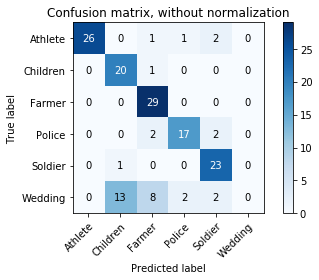

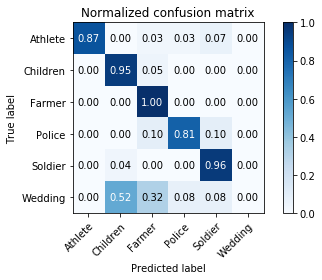

In [37]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# class_names = iris.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # Run classifier, using a model that is too regularized (C too low) to see
# # the impact on the results
# classifier = svm.SVC(kernel='linear', C=0.01)
# y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(actual, predicted)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
y_test = []
y_pred = []

class_names = ['Athlete', 'Children', 'Farmer', 'Police', 'Soldier', 'Wedding']

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [27]:
from sklearn.metrics import confusion_matrix

# pdb.set_trace()
confusion_matrix(actual, predicted)

array([], shape=(0, 0), dtype=int64)

In [48]:
from torchvision import models
from torchvision import transforms 
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.sampler import SubsetRandomSampler

batch_size = 50



input_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize((224, 224)),
    transforms.ColorJitter(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

dataset = EnglishDataset(transform=input_transforms)
dataset2 = CombinedDataset(transform=input_transforms)
dataset_loader = utils.DataLoader(dataset, batch_size=batch_size)
dataset2_loader = utils.DataLoader(dataset2, batch_size=batch_size)

## define our indices -- our dataset has 9 elements and we want a 8:4 split
num_train = len(dataset)
print(num_train)
indices = list(range(num_train))
split = 310

num_train2 = len(dataset2)
print(num_train2)
indices2 = list(range(num_train2))
split2 = 150

# 800 total
# 1400 train, 600 test
# image_edge_size = 128

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)# validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

validation_idx2 = np.random.choice(indices2, size=split2, replace=False)# validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx2 = list(set(indices2) - set(validation_idx2))

# Contiguous split
train_idx, validation_idx = indices[split:], indices[:split]
train_idx2, validation_idx2 = indices[split2:], indices[:split2]

## define our samplers -- we use a SubsetRandomSampler because it will return
## a random subset of the split defined by the given indices without replaf
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_loader = torch.utils.data.DataLoader(dataset, 
                batch_size=batch_size, sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(dataset, 
                batch_size=batch_size, sampler=validation_sampler)

train_sampler2 = SubsetRandomSampler(train_idx2)
validation_sampler2 = SubsetRandomSampler(validation_idx2)

train_loader2 = torch.utils.data.DataLoader(dataset2, 
                batch_size=batch_size, sampler=train_sampler2)

test_loader2 = torch.utils.data.DataLoader(dataset2, 
                batch_size=batch_size, sampler=validation_sampler2)

0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


1
2
3
4
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


1
2
3
4
5
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


1
2
3
4
5
750
1691
